### **Project Description – COVID-19 Image classification**

### Data Description:
You are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is to create a classifier capable of determining the class of the X-ray image.

### Dataset:
The project is inspired from a dataset from Kaggle. Note: For project purposes, the dataset is modified according to the learning requirements. You are provided with the following files:

• testimage.npy
• testLabels.csv
• trainimage.npy
• trainLabels.csv

### Context: 
•	Can you differentiate an X-ray image of a normal person from an unhealthy one? 
•	The ability to do so effectively can mean better diagnosis. 

### Objective: 
•	To implement the techniques learnt as a part of the course. 

### Learning Outcomes: 
•	Pre-processing of image data. 
•	Visualization of images. 
•	Building CNN. 
•	Evaluate the Model. 


### Steps and tasks: 

1.	Import the libraries, load dataset, print shape of data, visualize the images in train and test set. (5 Marks) [Hint: To load npy file, use the code: trainImages = np.load('trainimage.npy') ], It will give you a numpy array. Rest things are as usual (You already how to access numpy arrays.).

2.	Explore the data: (5 Marks) 

a.	Print the value count of each type of label in: 
i.	Training set 
ii.	Testing set 

b.	Find the number of unique labels in training set and print the names of those. 

3.	Data Pre-processing: (10 Marks) 
a.	Gaussian Blurring. [Hint: Use kernel size of (5, 5)] 
b.	Visualize data after performing the Gaussian blurring. 
c.	Normalization of data. 

4.	Make data compatible: (10 Marks) 
a.	Reshape data into shapes compatible with Keras models. 
b.	Convert labels to one hot vectors. 

5.	Building CNN: (15 Marks) 
a. Define layers. 
b.	Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.) 

6.	Fit and evaluate model and print confusion matrix. (10 Marks) 

7.	Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks) 


#### 1. Import the libraries, load dataset, print shape of data, visualize the images in train and test set. (5 Marks) [Hint: To load npy file, use the code: trainImages = np.load('trainimage.npy') ], It will give you a numpy array. Rest things are as usual (You already how to access numpy arrays.).

1a. Import the Libraries

In [1]:
# Install Library CV for Open cv2

!pip install opencv-python

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [3]:
# Importing necessary Libraries & Modules.

import warnings
import os
import sys

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras import datasets, models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical  # convert to one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow


 1b. Load the dataset

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [5]:
# from google.colab import drive 
# drive.mount ('/content/drive', force_remount=True)
# path = '/content/drive/MyDrive/Colab Notebooks/Data_002_CNN/'

In [6]:
!ls

drive  sample_data


In [7]:
!ls '/content/drive/MyDrive/Colab Notebooks/Data_002_CNN/'

covid-19-dataset  covid-19-dataset.zip


In [8]:
!pwd

/content


In [9]:
!unzip -u '/content/drive/MyDrive/Colab Notebooks/Data_002_CNN/covid-19-dataset.zip' -d '/content/drive/MyDrive/Colab Notebooks/Data_002_CNN/'

Archive:  /content/drive/MyDrive/Colab Notebooks/Data_002_CNN/covid-19-dataset.zip


In [10]:
# Preview the unzipped data in the drive

!head '/content/drive/MyDrive/Colab Notebooks/Data_002_CNN/covid-19-dataset/testLabels.csv'

Label
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia


In [11]:
!head '/content/drive/MyDrive/Colab Notebooks/Data_002_CNN/covid-19-dataset/trainLabels.csv'

Label
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia
Viral Pneumonia


In [12]:
# Load the test image file of dataset
testImages = np.load('/content/drive/My Drive/Colab Notebooks/Data_002_CNN/covid-19-dataset/testimage.npy')

# Load the train image file of dataset
trainImages = np.load('/content/drive/My Drive/Colab Notebooks/Data_002_CNN/covid-19-dataset/trainimage.npy')

# Load the test labels file of dataset
testLabels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_002_CNN/covid-19-dataset/testLabels.csv')

# Load the train labels file of dataset
trainLabels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_002_CNN/covid-19-dataset/trainLabels.csv')


###    1c. Explore and print shape of the data: (5 Marks)

In [13]:
print(testImages.shape)

(66, 128, 128, 3)


In [14]:
print(testImages.shape)
print(testLabels.shape)
print(trainImages.shape)
print(trainLabels.shape)

(66, 128, 128, 3)
(66, 1)
(251, 128, 128, 3)
(251, 1)


**1d. Visualiza the data images and display the labels**

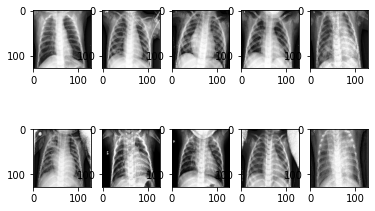

In [15]:
# Display some images from the test labels

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(testImages[i])

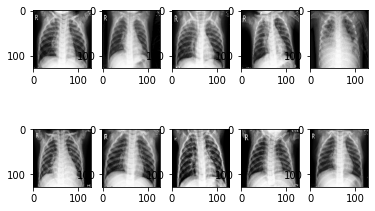

In [16]:
# Display some images from the train labels

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(trainImages[i])

In [17]:
testLabels.head()

,Label
0,Viral Pneumonia
1,Viral Pneumonia
2,Viral Pneumonia
3,Viral Pneumonia
4,Viral Pneumonia


In [18]:
trainLabels.head()

,Label
0,Viral Pneumonia
1,Viral Pneumonia
2,Viral Pneumonia
3,Viral Pneumonia
4,Viral Pneumonia


### 2. Explore the data: (5 Marks)

#### 2a. Print the value count of each type of label in the (i.) Training set and the (ii.) Testing set

In [19]:
# Show Value Count for the training set

trainLabels.apply(pd.Series.value_counts).head()

,Label
Covid,111
Viral Pneumonia,70
Normal,70


In [20]:
# Show Value Count for the test set

testLabels.apply(pd.Series.value_counts).head()

,Label
Covid,26
Normal,20
Viral Pneumonia,20


### 2b. Find the number of unique labels in training set and print the names of those.

In [21]:
trainLabels['Label'].value_counts()

Covid              111
Viral Pneumonia     70
Normal              70
Name: Label, dtype: int64

In [22]:
# Getting unique label values in column 'Label' of the training dataset/dataframe

Train_uniqueLabels = trainLabels['Label'].unique()
print('Unique elements in column Label of training dataset:', Train_uniqueLabels)


Unique elements in column Label of training dataset: ['Viral Pneumonia' 'Covid' 'Normal']


### 3. Data Pre-processing: (10 Marks)

**Applying image processing on the images dataset**

3a. Gaussian Blurring.

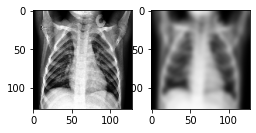

In [23]:
# Applying Gaussian Blurring using kernel size of (5, 5) - Test Images dataset

test_preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for test_img in testImages:
    # Use gaussian blur
    test_blurImg = cv2.GaussianBlur(test_img, (15, 15), 0)   

    test_preprocessed_images.append(test_blurImg)           # Append image 

# And visualized example below

plt.subplot(1, 3, 1); plt.imshow(test_img)                  # Show the original image
plt.subplot(1, 3, 2); plt.imshow(test_blurImg)              # Blur image

test_preprocessed_images = np.asarray(test_preprocessed_images)   # Convert to numpy array.

Observation : Using a big factor of blurring i.e. (15,15) makes the image too blurred, hence better to use a lower kernel size like (5,5)

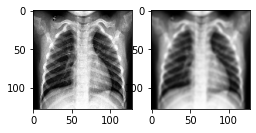

In [24]:
# Applying Gaussian Blurring using kernel size of (5, 5) - Train Images dataset

train_preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for train_img in trainImages:
    # Use gaussian blur
    train_blurImg = cv2.GaussianBlur(train_img, (5, 5), 0)   

    train_preprocessed_images.append(train_blurImg)                 # Append image 
    
# Examples : Visualize samples of Original & Blurred images

plt.subplot(1, 3, 1); plt.imshow(train_img)                         # Visulaize Original image
plt.subplot(1, 3, 2); plt.imshow(train_blurImg)                     # Visualize Blurred image

train_preprocessed_images = np.asarray(train_preprocessed_images)   # Convert to numpy array.

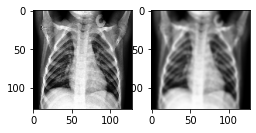

In [25]:
# Applying Gaussioan Blurring using kernel size of (5, 5) - Test Images dataset

test_preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for test_img in testImages:
    # Use gaussian blur
    test_blurImg = cv2.GaussianBlur(test_img, (5, 5), 0)   
       
    test_preprocessed_images.append(test_blurImg)           # Append image 
    
# Examples : Visualize samples of Original & Blurred images

plt.subplot(1, 3, 1); plt.imshow(test_img)                  # Visulaize Original image
plt.subplot(1, 3, 2); plt.imshow(test_blurImg)              # Visualize Blurred image

test_preprocessed_images = np.asarray(test_preprocessed_images)       # Convert to numpy array.

Observation: Using a kernel size of (5,5) improves image clarity enough.

3b. Visualize data after performing the Gaussian blurring.

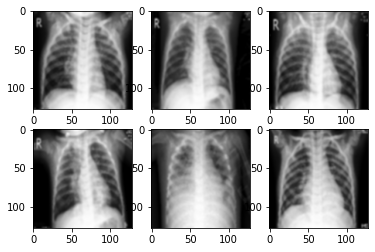

In [26]:
# Visualization of data after Gaussian Blurring - Train dataset

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(train_preprocessed_images[i])

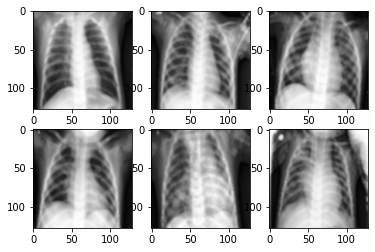

In [27]:
# Visualization of data after Gaussian Blurring - Test dataset

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_preprocessed_images[i])

Observation: Images are blurred

### 4. Making the data compatible: (10 Marks)

a.) Reshape data into shapes compatible with Keras models, if not already, print the label for y_train[0] & y_test[0], and check the shape of the data 

b.)  Convert labels from digits to one hot vectors 


4a. Reshape data into shapes compatible with Keras models, if already not compatible and check shape of data

In [28]:
# Add a fourth dimension for the farmat that tensorflow.keras expects, for 3 = colour image so that CNN can calculate teh volumes appropriately.

x_train = train_preprocessed_images
x_test = test_preprocessed_images

x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

4b. Normalization of image data.

In [29]:
# Ensure that the values are float so that we can get decimal points after division

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [30]:
# Normalization of both training and test images data by turning them between 0 and 1   

x_train /= 255
x_test /= 255

In [31]:
# Assign labels to y_train and y_test

y_train = trainLabels
y_test = testLabels

4c.) Check the shape of the data 

In [32]:
# Print and check shape of data and number of images

print("x_train shape:", x_train.shape)
print("Images in x_train:", x_train.shape[0])
print("Images in x_test:", x_test.shape[0])
print("Max value in x_train:", x_train.max())
print("Min value in x_train:", x_train.min())

x_train shape: (251, 128, 128, 3)
Images in x_train: 251
Images in x_test: 66
Max value in x_train: 1.0
Min value in x_train: 0.0


Note : Image data already in Keras compatible format, so there isno need of reshaping it

4d.)  Convert labels from digits to one hot vectors 

In [33]:
# Convert labels from digits to one hot vectors - train labels

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(trainLabels)

In [34]:
# Print one-hot encoded label for train dataset, y_train[0]

y_train[0]

array([0, 0, 1])

In [35]:
# Convert labels from digits to one hot vectors - test labels

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_test = enc.fit_transform(testLabels)

In [36]:
# Print  one-hot encoded label for test dataset, y_test[0]

y_test[0]

array([0, 0, 1])

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 3)
(66, 128, 128, 3)
(66, 3)


### 5. Building CNN: (15 Marks)

5a. Define layers.

1. Initialize a sequential model again
2. Initializing the sequential model and Defining the 2 convolutional layers.
3. no of filters: 32
4. kernel size: 3x3
5. activation: "relu"
6. input shape: (128, 128, 3) for first layer
7. flatten the data, add Flatten later
8. flatten layers flatten 2D arrays to 1D array before building the fully connected layers and add 2 dense layers
8i.) number of neurons in first layer: 128
8ii.)number of neurons in last layer: number of classes
9. activation function in first layer: relu
10. activation function in last layer: softmax

In [38]:
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

**### Compile and fit the model**

Compile our model
1. loss: "categorical_crossentropy"
2. metrics: "accuracy"
3. optimizer: "adam"

Then fit model
4. give train data - training features and labels
5. batch size: 32
6. epochs: 10
7. give validation data - testing features and labels

5b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [39]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

### 6. Fit and evaluate model and print confusion matrix. (10 Marks)

6a. Fit the model

In [40]:
random_seed = 2
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, Y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=random_seed)

In [41]:
print(x_test.shape)
print(x_val.shape)

(33, 128, 128, 3)
(33, 128, 128, 3)


In [42]:
# Fit the model
covid_map = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_split = 0.3, validation_data = (x_val,Y_val))

Epoch 1/20
6/6 [==============================] - 8s 1s/step - loss: 11.8272 - accuracy: 0.5486 - val_loss: 89.0184 - val_accuracy: 0.0789
Epoch 2/20
6/6 [==============================] - 8s 1s/step - loss: 2.6241 - accuracy: 0.6857 - val_loss: 51.5658 - val_accuracy: 0.0789
Epoch 3/20
6/6 [==============================] - 8s 1s/step - loss: 0.6167 - accuracy: 0.8686 - val_loss: 56.2728 - val_accuracy: 0.0789
Epoch 4/20
6/6 [==============================] - 8s 1s/step - loss: 0.2027 - accuracy: 0.9657 - val_loss: 65.9695 - val_accuracy: 0.0789
Epoch 5/20
6/6 [==============================] - 8s 1s/step - loss: 0.2289 - accuracy: 0.9714 - val_loss: 63.7538 - val_accuracy: 0.0789
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.1590 - accuracy: 0.9657 - val_loss: 43.2633 - val_accuracy: 0.0789
Epoch 7/20
6/6 [==============================] - 8s 1s/step - loss: 0.0733 - accuracy: 0.9771 - val_loss: 16.7772 - val_accuracy: 0.0789
Epoch 8/20
6/6 [=================

Observation with epoch=10
1. Loss = 0.0667
2. Accuracy = 97.71%
3. Val_loss = 16.1290
4. Val_accuracy = 7.89%

With epoch=20
1. Loss = 0.00004
2. Accuracy = 100%
3. Val_loss = 34.1584
4. Val_accuracy = 7.89%

With a higher epoch, Loss increases, Accuracy reduces, val_loss increases and val_accuracy stays the same, so model could be overfitting

6b. Evaluate the model)

In [47]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 20ms/step - loss: 9.1027 - accuracy: 0.7576


[9.102700233459473, 0.7575757503509521]

Observation : Model gives higher accuarcy levels on test set than in training, so the model may not be slightly overfitting.

6c. Print confusion matrix

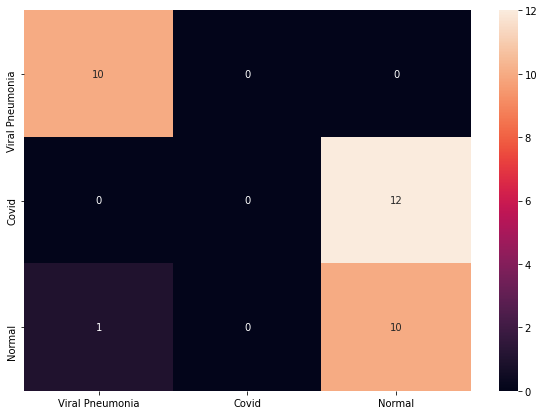

In [48]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['Viral Pneumonia', 'Covid', 'Normal']],
                  columns = [i for i in ['Viral Pneumonia', 'Covid', 'Normal']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

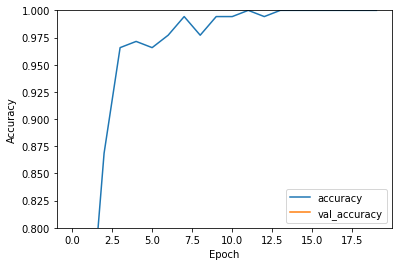

In [50]:
plt.plot(covid_map.history['accuracy'], label='accuracy')
plt.plot(covid_map.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.legend(loc='lower right');

### 7. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

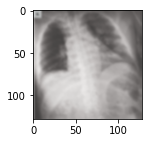

Predicted Label 0
True Label 0


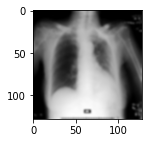

Predicted Label 0
True Label 0


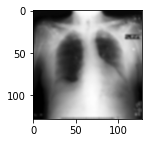

Predicted Label 0
True Label 0


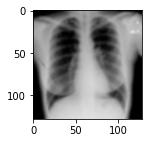

Predicted Label 0
True Label 0


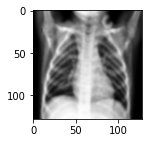

Predicted Label 2
True Label 1


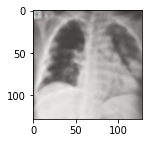

Predicted Label 0
True Label 0


IndexError: ignored

<Figure size 144x144 with 0 Axes>

In [52]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[12],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[12].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[12]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[18],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[18].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[18]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[24],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[24].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[24]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[32],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[32].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[32]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

plt.figure(figsize=(2,2))
plt.imshow(x_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(x_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

Summary
1. Visualization of images beyond 32, is not possible as there are 32 images